In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
# generate a dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers= 3, cluster_std= 1.0, random_state=42)

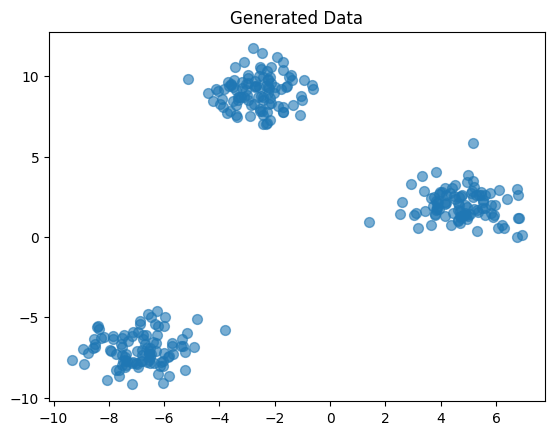

In [3]:
# scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], s = 50, alpha = 0.6)
plt.title("Generated Data")
plt.show()

### Implementing K-Means from Scratch

In [4]:
class KMeansClustering:
    def __init__(self, k, max_iters = 100, tol = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol      # tolerance for convergence

    def fit(self, X):
        """
        Fits K-Means to the data X
        """

        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]  # Initialize K centroids randomly

        for _ in range(self.max_iters):
            # Step 1: Assign each point to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)  # Compute distances
            self.labels = np.argmin(distances, axis=1)  # Assign to nearest centroid

            # Step 2: Compute new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Step 3: Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids   # update centroid

    def predict(self, X):
        """
        Assigns new data to the nearest centroid
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis = 2)
        return np.argmin(distances, axis = 1)


In [6]:
# Run KMeans on the generated dataset
kmeans = KMeansClustering(k=3)
kmeans.fit(X)

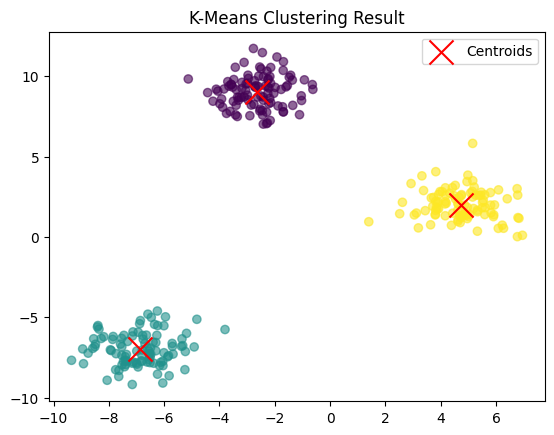

In [7]:
# Plot final clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='x', label="Centroids")
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()